# Contents : Marketing
# 1. 라이브러리 불러오기

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import datetime as dt
import os

import warnings
warnings.filterwarnings('ignore')

# 2. 폰트설정

In [44]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

In [45]:
pd.options.display.max_columns=None
# pd.options.display.max_rows=10

# 3. 데이터불러오기(mql, closed_deal)

In [46]:
# 원본 데이터들
path = glob.glob('../PJT_01/NanoDegree_PJT1/1.EDA/data/*.*')
path

['../PJT_01/NanoDegree_PJT1/1.EDA/data\\olist_closed_deals_dataset.csv',
 '../PJT_01/NanoDegree_PJT1/1.EDA/data\\olist_customers_dataset.csv',
 '../PJT_01/NanoDegree_PJT1/1.EDA/data\\olist_geolocation_dataset.csv',
 '../PJT_01/NanoDegree_PJT1/1.EDA/data\\olist_marketing_qualified_leads_dataset.csv',
 '../PJT_01/NanoDegree_PJT1/1.EDA/data\\olist_orders_dataset.csv',
 '../PJT_01/NanoDegree_PJT1/1.EDA/data\\olist_order_items_dataset.csv',
 '../PJT_01/NanoDegree_PJT1/1.EDA/data\\olist_order_payments_dataset.csv',
 '../PJT_01/NanoDegree_PJT1/1.EDA/data\\olist_order_reviews_dataset.csv',
 '../PJT_01/NanoDegree_PJT1/1.EDA/data\\olist_products_dataset.csv',
 '../PJT_01/NanoDegree_PJT1/1.EDA/data\\olist_sellers_dataset.csv',
 '../PJT_01/NanoDegree_PJT1/1.EDA/data\\product_category_name_translation.csv']

In [63]:
mql = pd.read_csv('../PJT_01/NanoDegree_PJT1/1.EDA/data\\olist_marketing_qualified_leads_dataset.csv')
mql.shape

(8000, 4)

In [106]:
closed_deals = pd.read_csv('../PJT_01/NanoDegree_PJT1/1.EDA/data\\olist_closed_deals_dataset.csv')
closed_deals.shape

(842, 14)

# 4.데이터 확인

In [107]:
closed_deals.head(2)

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0


In [108]:
closed_deals.tail(2)

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
840,40955be51cc85c5a5a6cdd12b19e9f10,c0e933c238e41f0cd459d6025ee9b364,068066e24f0c643eb1d089c7dd20cd73,d3d1e91a157ea7f90548eef82f1955e3,2018-03-06 15:52:23,pet,online_beginner,cat,NaN,NaN,NaN,reseller,NaN,0.0
841,8a6492305a5fbcdcdd1a7f5a90764c07,1bba9c94eb5c4e82fba9f7286fe81025,56bf83c4bb35763a51c2baab501b4c67,de63de0d10a6012430098db33c679b0b,2018-05-02 13:31:32,household_utilities,industry,eagle,NaN,NaN,NaN,manufacturer,NaN,0.0


In [67]:
close_deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         842 non-null    object 
 1   seller_id                      842 non-null    object 
 2   sdr_id                         842 non-null    object 
 3   sr_id                          842 non-null    object 
 4   won_date                       842 non-null    object 
 5   business_segment               841 non-null    object 
 6   lead_type                      836 non-null    object 
 7   lead_behaviour_profile         665 non-null    object 
 8   has_company                    63 non-null     object 
 9   has_gtin                       64 non-null     object 
 10  average_stock                  66 non-null     object 
 11  business_type                  832 non-null    object 
 12  declared_product_catalog_size  69 non-null     flo

In [68]:
mql.head(2)

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search


In [69]:
mql.tail(2)

,mql_id,first_contact_date,landing_page_id,origin
7998,4f8c96e2509b984329044c6682c88ee9,2017-10-06,a56671a54260a44923d32c2f08fad39c,organic_search
7999,8a6492305a5fbcdcdd1a7f5a90764c07,2018-01-11,b76ef37428e6799c421989521c0e5077,direct_traffic


In [70]:
mql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              7940 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB


# 5.데이터 정리
## (1) 시간순

In [71]:
mql = mql.sort_values('first_contact_date')
mql

,mql_id,first_contact_date,landing_page_id,origin
1973,0b99dab71519032b917dc641cdd7ac5b,2017-06-14,d41d8cd98f00b204e9800998ecf8427e,NaN
5232,6dd0ef38856fd5fb21aed5223aea9e66,2017-06-14,8f08d2ef8b9aec2ec5118fbcf7f96f11,display
5358,70bd89abdbdba90e471cd3d0bbdbac49,2017-06-16,8f08d2ef8b9aec2ec5118fbcf7f96f11,unknown
2676,98c9832865e4ab224a1649e8e6e9a2a0,2017-06-20,b6cd08ac77c501fd6857f7916d2c24f3,email
2976,e1e32379b464961f67fba6ddf6d4b3b7,2017-07-02,0b37d43dbde6452cdd94c17bf61a88e4,direct_traffic
...,...,...,...,...
7570,10bd89509a170e478e62697df43a5984,2018-05-31,58326e62183c14b0c03085c33b9fdc44,social
7568,6649b621033ae95a2e9da0dd9c99fa48,2018-05-31,320669df6e03fc8a691a1a4c61c56a32,unknown
1900,9012a1c75d959d58edd3a3fc1c0f5b75,2018-05-31,58326e62183c14b0c03085c33b9fdc44,social
3280,60041d31882e8d08e106b82dd4197a76,2018-05-31,ce1a65abd0973638f1c887a6efcfa82d,organic_search


In [72]:
mql = mql.reset_index()

In [73]:
del mql['index']

In [74]:
mql

,mql_id,first_contact_date,landing_page_id,origin
0,0b99dab71519032b917dc641cdd7ac5b,2017-06-14,d41d8cd98f00b204e9800998ecf8427e,NaN
1,6dd0ef38856fd5fb21aed5223aea9e66,2017-06-14,8f08d2ef8b9aec2ec5118fbcf7f96f11,display
2,70bd89abdbdba90e471cd3d0bbdbac49,2017-06-16,8f08d2ef8b9aec2ec5118fbcf7f96f11,unknown
3,98c9832865e4ab224a1649e8e6e9a2a0,2017-06-20,b6cd08ac77c501fd6857f7916d2c24f3,email
4,e1e32379b464961f67fba6ddf6d4b3b7,2017-07-02,0b37d43dbde6452cdd94c17bf61a88e4,direct_traffic
...,...,...,...,...
7995,10bd89509a170e478e62697df43a5984,2018-05-31,58326e62183c14b0c03085c33b9fdc44,social
7996,6649b621033ae95a2e9da0dd9c99fa48,2018-05-31,320669df6e03fc8a691a1a4c61c56a32,unknown
7997,9012a1c75d959d58edd3a3fc1c0f5b75,2018-05-31,58326e62183c14b0c03085c33b9fdc44,social
7998,60041d31882e8d08e106b82dd4197a76,2018-05-31,ce1a65abd0973638f1c887a6efcfa82d,organic_search


# 6.MQL
## (1)살펴보기 - 상위 랜딩페이지

In [75]:
mql['landing_page_id'].value_counts().head(10)

b76ef37428e6799c421989521c0e5077    912
22c29808c4f815213303f8933030604c    883
58326e62183c14b0c03085c33b9fdc44    495
88740e65d5d6b056e0cda098e1ea6313    445
ce1a65abd0973638f1c887a6efcfa82d    394
40dec9f3d5259a3d2dbcdab2114fae47    330
f017be4dbf86243af5c1ebed0cff36a2    310
e492ee5eaf1697716985cc6f33f9cd9b    291
a7982125ff7aa3b2054c6e44f9d28522    156
73f31a40697cc90a86c1273563ac230e    115
Name: landing_page_id, dtype: int64

## (1)살펴보기 - 유입경로

In [76]:
mql['origin'].value_counts()

organic_search       2296
paid_search          1586
social               1350
unknown              1099
direct_traffic        499
email                 493
referral              284
other                 150
display               118
other_publicities      65
Name: origin, dtype: int64

In [77]:
mql['origin'].value_counts().sum()

7940

<strong> 나머지 60개는 nan -> 랜딩페이지가 전부 존재하기 때문에 기존에 있는 unknown으로 바꾸자</strong>
## (2)데이터 정리 - 결측치

In [78]:
mql[mql['origin'].isnull()].head(2)

,mql_id,first_contact_date,landing_page_id,origin
0,0b99dab71519032b917dc641cdd7ac5b,2017-06-14,d41d8cd98f00b204e9800998ecf8427e,NaN
30,0138fa79ed7cc7113e031e4ac11bd26a,2017-07-07,22c29808c4f815213303f8933030604c,NaN


In [79]:
# nan값 direact로 변환
mql['origin'] = mql['origin'].fillna('unknown')

In [80]:
mql['origin'].value_counts()

organic_search       2296
paid_search          1586
social               1350
unknown              1159
direct_traffic        499
email                 493
referral              284
other                 150
display               118
other_publicities      65
Name: origin, dtype: int64

## (2) 데이터정리 - 파생변수
### 파생변수 : 유입에서 non_paid과 paid로 나누자 

- non_paid : organic_search, direct_traffic
- paid : paid_search, social, email, referral, other, display, other_publicities
- unknown : unknown

In [81]:
def paid_decision(value):
#non_paid
    if value == 'organic_search':
        return 'non_paid'
    elif value == 'direct_traffic':
        return 'non_paid'
#paid    
    elif value in 'paid_search':
        return 'paid'           
    elif value in 'social':
        return 'paid'              
    elif value in 'email':
        return 'paid'           
    elif value in 'referral':
        return 'paid'
    elif value in 'other':
        return 'paid'
    elif value in 'display':
        return 'paid'
    elif value in 'other_publicities':
        return 'paid'
# unknown
    else:
        return'unknown'

In [82]:
mql['isPaid'] = mql.apply(lambda x: paid_decision(x['origin']),axis=1)

In [83]:
mql.head(2)

,mql_id,first_contact_date,landing_page_id,origin,isPaid
0,0b99dab71519032b917dc641cdd7ac5b,2017-06-14,d41d8cd98f00b204e9800998ecf8427e,unknown,unknown
1,6dd0ef38856fd5fb21aed5223aea9e66,2017-06-14,8f08d2ef8b9aec2ec5118fbcf7f96f11,display,paid


## (2)데이터정리 - 컬럼명
### 컬럼이름 바꾸기 organic ->channel로

In [84]:
mql.columns = ['mql_id', 'first_contact_date', 'landing_page_id', 'channel', 'isPaid']

In [85]:
mql.head(2)

,mql_id,first_contact_date,landing_page_id,channel,isPaid
0,0b99dab71519032b917dc641cdd7ac5b,2017-06-14,d41d8cd98f00b204e9800998ecf8427e,unknown,unknown
1,6dd0ef38856fd5fb21aed5223aea9e66,2017-06-14,8f08d2ef8b9aec2ec5118fbcf7f96f11,display,paid


## (3) 광고유입 여부 따른 차이 비교


In [86]:
mql['isPaid'].value_counts()

paid        4046
non_paid    2795
unknown     1159
Name: isPaid, dtype: int64

In [87]:
mql_paid = mql['isPaid'].value_counts().to_frame()
mql_paid = mql_paid.reset_index()
mql_paid.columns = ['isPaid', 'cnt']
mql_paid

,isPaid,cnt
0,paid,4046
1,non_paid,2795
2,unknown,1159


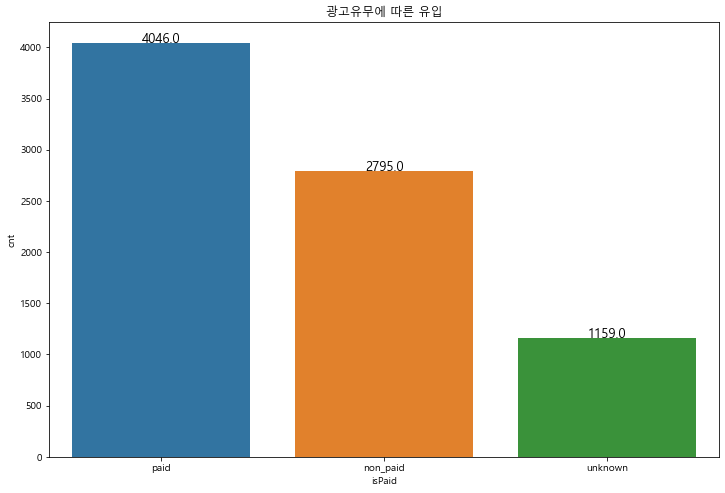

In [88]:
plt.figure (figsize = (12,8))
ax = sns.barplot(data = mql_paid, x = 'isPaid', y = 'cnt' ,ci = None)
plt.title('광고유무에 따른 유입')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 13)

plt.show()

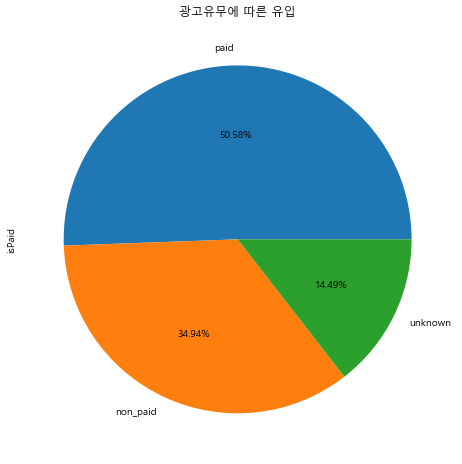

In [161]:
plt.figure (figsize = (12,8), facecolor = 'white')
mql['isPaid'].value_counts().plot.pie(autopct='%.2f%%')
plt.title('광고유무에 따른 유입')
plt.show()

### channel에 따른 유입 비교

In [90]:
mql_channel = mql['channel'].value_counts().to_frame()
mql_channel = mql_channel.reset_index()
mql_channel.columns = ['channel', 'cnt']
mql_channel

,channel,cnt
0,organic_search,2296
1,paid_search,1586
2,social,1350
3,unknown,1159
4,direct_traffic,499
5,email,493
6,referral,284
7,other,150
8,display,118
9,other_publicities,65


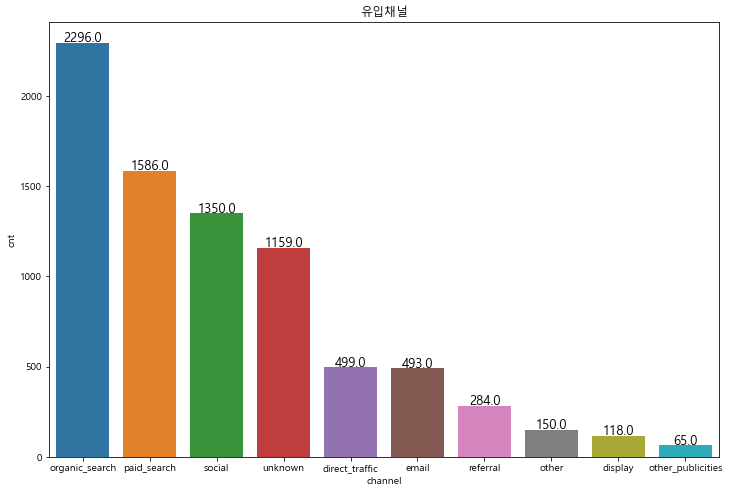

In [162]:
plt.figure (figsize = (12,8))
ax = sns.barplot(data = mql_channel, x = 'channel', y = 'cnt' ,ci = None)
plt.title('유입채널')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 13)

plt.show()

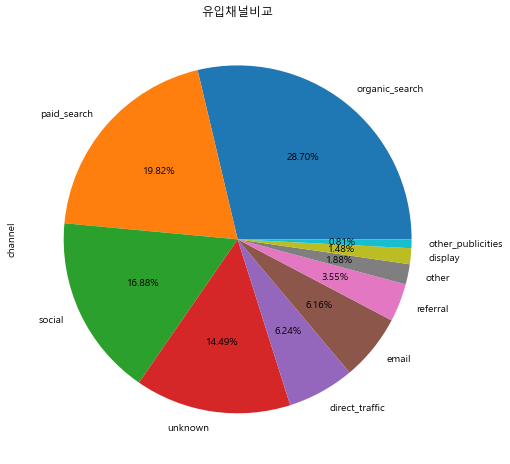

In [163]:
plt.figure (figsize = (12,8), facecolor = 'white')
mql['channel'].value_counts().plot.pie(autopct='%.2f%%')
plt.title('유입채널비교')
plt.show()

# 상위 랜딩페이지의 광고효과를 보자

In [93]:
mql.head(2)

,mql_id,first_contact_date,landing_page_id,channel,isPaid
0,0b99dab71519032b917dc641cdd7ac5b,2017-06-14,d41d8cd98f00b204e9800998ecf8427e,unknown,unknown
1,6dd0ef38856fd5fb21aed5223aea9e66,2017-06-14,8f08d2ef8b9aec2ec5118fbcf7f96f11,display,paid


In [94]:
# 상위 랜딩 페이지 5개
mql['landing_page_id'].value_counts().head()

b76ef37428e6799c421989521c0e5077    912
22c29808c4f815213303f8933030604c    883
58326e62183c14b0c03085c33b9fdc44    495
88740e65d5d6b056e0cda098e1ea6313    445
ce1a65abd0973638f1c887a6efcfa82d    394
Name: landing_page_id, dtype: int64

In [95]:
len(mql['landing_page_id'].value_counts())

495

In [96]:
# 상위 랜딩 페이지 5개에서 랜딩한 숫자
mql['landing_page_id'].value_counts().head().sum()

3129

### 총랜딩페이지 495개중 상위 5개의 랜딩페이지가 총랜딩인 8000개중 3129개를 랜딩함(상위 1%의 랜딩페이지가 39%의 랜딩을 담당함)

In [97]:
mql['landing_page_id'].value_counts().head().keys()

Index(['b76ef37428e6799c421989521c0e5077', '22c29808c4f815213303f8933030604c',
       '58326e62183c14b0c03085c33b9fdc44', '88740e65d5d6b056e0cda098e1ea6313',
       'ce1a65abd0973638f1c887a6efcfa82d'],
      dtype='object')

In [98]:
for i in mql['landing_page_id'].value_counts().head().keys():
        landing_top5 = mql[mql['landing_page_id']== i]
        print(landing_top5['isPaid'].value_counts())

unknown     657
non_paid    141
paid        114
Name: isPaid, dtype: int64
non_paid    600
paid        242
unknown      41
Name: isPaid, dtype: int64
paid        474
non_paid     14
unknown       7
Name: isPaid, dtype: int64
paid        428
non_paid     10
unknown       7
Name: isPaid, dtype: int64
non_paid    278
paid        102
unknown      14
Name: isPaid, dtype: int64


# 날짜별 차이
## 상위 5일

In [99]:
mql['first_contact_date'].value_counts().head()

2018-05-02    93
2018-05-15    76
2018-01-22    75
2018-02-06    71
2018-03-26    70
Name: first_contact_date, dtype: int64

In [100]:
len(mql['first_contact_date'].value_counts())

336

In [101]:
mql['first_contact_date'].value_counts().head().sum()

385

In [102]:
mql['first_contact_date'].value_counts().head().keys()

Index(['2018-05-02', '2018-05-15', '2018-01-22', '2018-02-06', '2018-03-26'], dtype='object')

In [103]:
for i in mql['first_contact_date'].value_counts().head().keys():
        landing_top5 = mql[mql['first_contact_date']== i]
        print(landing_top5['isPaid'].value_counts())

paid        57
non_paid    23
unknown     13
Name: isPaid, dtype: int64
paid        41
non_paid    18
unknown     17
Name: isPaid, dtype: int64
paid        34
non_paid    28
unknown     13
Name: isPaid, dtype: int64
paid        37
non_paid    24
unknown     10
Name: isPaid, dtype: int64
paid        32
non_paid    30
unknown      8
Name: isPaid, dtype: int64


# df = Merge(mql + deals)

In [109]:
df = pd.merge(mql, closed_deals, left_on = 'mql_id',right_on = 'mql_id', how= 'outer')
df.shape

(8000, 18)

In [110]:
df.head(2)

,mql_id,first_contact_date,landing_page_id,channel,isPaid,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,0b99dab71519032b917dc641cdd7ac5b,2017-06-14,d41d8cd98f00b204e9800998ecf8427e,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6dd0ef38856fd5fb21aed5223aea9e66,2017-06-14,8f08d2ef8b9aec2ec5118fbcf7f96f11,display,paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


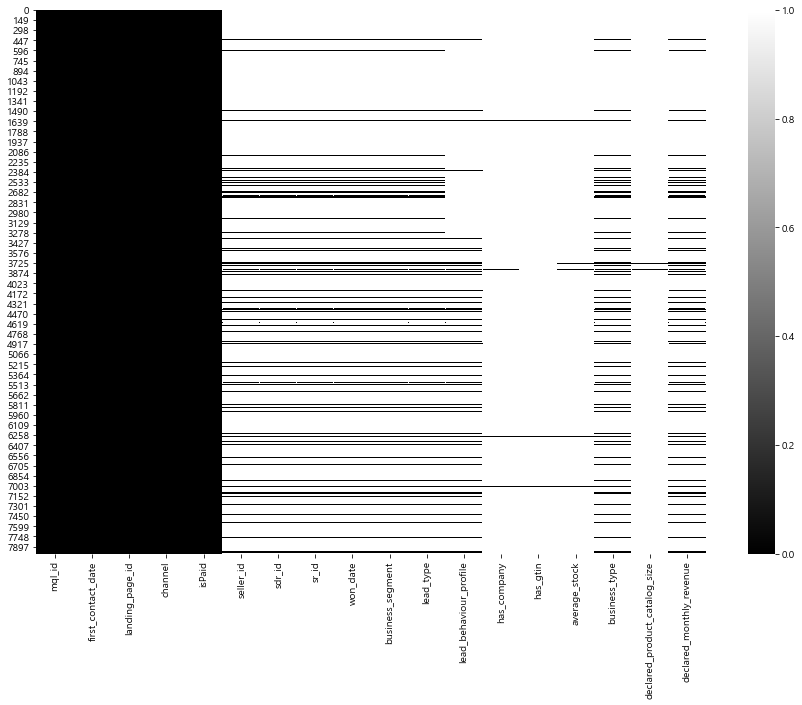

In [111]:
plt.figure(figsize = (15,10))
sns.heatmap(df.isnull(), cmap = 'gray')
plt.show()

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         8000 non-null   object 
 1   first_contact_date             8000 non-null   object 
 2   landing_page_id                8000 non-null   object 
 3   channel                        8000 non-null   object 
 4   isPaid                         8000 non-null   object 
 5   seller_id                      842 non-null    object 
 6   sdr_id                         842 non-null    object 
 7   sr_id                          842 non-null    object 
 8   won_date                       842 non-null    object 
 9   business_segment               841 non-null    object 
 10  lead_type                      836 non-null    object 
 11  lead_behaviour_profile         665 non-null    object 
 12  has_company                    63 non-null     o

# 데이터 확인 및 컬럼 정리
## 데이터 확인

In [113]:
df.shape

(8000, 18)

In [114]:
df.head(2)

,mql_id,first_contact_date,landing_page_id,channel,isPaid,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,0b99dab71519032b917dc641cdd7ac5b,2017-06-14,d41d8cd98f00b204e9800998ecf8427e,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6dd0ef38856fd5fb21aed5223aea9e66,2017-06-14,8f08d2ef8b9aec2ec5118fbcf7f96f11,display,paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
df.tail(2)

,mql_id,first_contact_date,landing_page_id,channel,isPaid,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
7998,60041d31882e8d08e106b82dd4197a76,2018-05-31,ce1a65abd0973638f1c887a6efcfa82d,organic_search,non_paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7999,5572975b6c55e23bb68391acaa8ca141,2018-05-31,b76ef37428e6799c421989521c0e5077,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 컬럼 정리

In [116]:
len(df.columns)

18

In [117]:
[i for i in df.columns]

['mql_id',
 'first_contact_date',
 'landing_page_id',
 'channel',
 'isPaid',
 'seller_id',
 'sdr_id',
 'sr_id',
 'won_date',
 'business_segment',
 'lead_type',
 'lead_behaviour_profile',
 'has_company',
 'has_gtin',
 'average_stock',
 'business_type',
 'declared_product_catalog_size',
 'declared_monthly_revenue']

In [118]:
# 필요컬럼
new_cols = [ 
 # marketing
 # mql
 'seller_id',
 'mql_id',
 'sdr_id',
 'sr_id',
 'won_date',
 'business_segment',
 'lead_type',
 'lead_behaviour_profile',
 'landing_page_id',
 'business_type',
 # mql
 'first_contact_date',
 'landing_page_id',
 'channel',
'isPaid'
]

In [119]:
df = df[new_cols]

In [120]:
len(df.columns)

14

In [121]:
df.head(2)

,seller_id,mql_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,landing_page_id,business_type,first_contact_date,landing_page_id,channel,isPaid
0,NaN,0b99dab71519032b917dc641cdd7ac5b,NaN,NaN,NaN,NaN,NaN,NaN,d41d8cd98f00b204e9800998ecf8427e,NaN,2017-06-14,d41d8cd98f00b204e9800998ecf8427e,unknown,unknown
1,NaN,6dd0ef38856fd5fb21aed5223aea9e66,NaN,NaN,NaN,NaN,NaN,NaN,8f08d2ef8b9aec2ec5118fbcf7f96f11,NaN,2017-06-14,8f08d2ef8b9aec2ec5118fbcf7f96f11,display,paid


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               842 non-null    object
 1   mql_id                  8000 non-null   object
 2   sdr_id                  842 non-null    object
 3   sr_id                   842 non-null    object
 4   won_date                842 non-null    object
 5   business_segment        841 non-null    object
 6   lead_type               836 non-null    object
 7   lead_behaviour_profile  665 non-null    object
 8   landing_page_id         8000 non-null   object
 9   business_type           832 non-null    object
 10  first_contact_date      8000 non-null   object
 11  landing_page_id         8000 non-null   object
 12  channel                 8000 non-null   object
 13  isPaid                  8000 non-null   object
dtypes: object(14)
memory usage: 937.5+ KB


# 유입된 seller들만 걸러내기 

In [123]:
df2 = df[df['sdr_id'].notnull()]
df2

,seller_id,mql_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,landing_page_id,business_type,first_contact_date,landing_page_id,channel,isPaid
62,53be10ff134691e94a4089b41c75874f,33ce1e734d9d50629fa2c36769285d53,2b63542749aa9caf15f21816da1db341,d3d1e91a157ea7f90548eef82f1955e3,2018-09-11 13:14:37,construction_tools_house_garden,online_small,wolf,d41d8cd98f00b204e9800998ecf8427e,reseller,2017-07-11,d41d8cd98f00b204e9800998ecf8427e,unknown,unknown
91,160851d3ece7aa1a510f8d1a4bb8a8af,e2e57ded5b59a2058dd5855564c6b5ea,b90f87164b5f8c2cfa5c8572834dbe3f,4b339f9567d060bcea4f5136b9f5949e,2018-07-18 20:24:28,construction_tools_house_garden,industry,cat,b76ef37428e6799c421989521c0e5077,manufacturer,2017-07-14,b76ef37428e6799c421989521c0e5077,unknown,unknown
249,120476eb7a04c149d14772edaf5d9bf2,0de705dc7d8026cc9b2128b775e4c35e,b90f87164b5f8c2cfa5c8572834dbe3f,85fc447d336637ba1df43e793199fbc8,2018-06-25 18:42:15,construction_tools_house_garden,online_big,wolf,3cd2a8301d5395f21cdd3094c9eaa2f4,reseller,2017-08-01,3cd2a8301d5395f21cdd3094c9eaa2f4,paid_search,paid
442,d449188091598bf0dbd32c312570f168,0ec14948e088cd74e70ad82de1128b3b,34d40cdaf94010a1d05b0d6212f9e909,495d4e95a8cf8bbf8b432b612a2aa328,2018-06-29 18:28:26,audio_video_electronics,offline,shark,87732658ba41d8775e8577df347a64db,reseller,2017-08-16,87732658ba41d8775e8577df347a64db,social,paid
449,7c7d0dee362960b1d9b01fe7284e19ba,b39ac02ff5021fed10cb9988a23d5d02,6aa3b86a83d784b05f0e37e26b20860d,56bf83c4bb35763a51c2baab501b4c67,2018-08-23 21:56:01,home_decor,online_small,shark,1722481ac9e5371e5099dea226b5421d,manufacturer,2017-08-17,1722481ac9e5371e5099dea226b5421d,social,paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7977,1d953075c2f0dd990bacf27b83b330f1,aadd608980d2f5f7ee3942cc912eef00,4b339f9567d060bcea4f5136b9f5949e,4ef15afb4b2723d8f3d81e51ec7afefe,2018-06-20 12:24:10,computers,online_medium,"cat, wolf",a7982125ff7aa3b2054c6e44f9d28522,reseller,2018-05-31,a7982125ff7aa3b2054c6e44f9d28522,organic_search,non_paid
7979,1f080fb8ad65b21e195b903bd366ae68,56e421575126bfe4c0592353bab5cfe6,370c9f455f93a9a96cbe9bea48e70033,56bf83c4bb35763a51c2baab501b4c67,2018-06-07 13:59:42,pet,online_medium,cat,35c9b150ab36fe584c1f24fd458c453a,reseller,2018-05-31,35c9b150ab36fe584c1f24fd458c453a,paid_search,paid
7987,71729348559edea55a3e7a2bc2a2986d,06bc22c1b089be523e97524b67084ca0,4b339f9567d060bcea4f5136b9f5949e,fbf4aef3f6915dc0c3c97d6812522f6a,2018-06-06 17:50:28,health_beauty,online_medium,cat,b76ef37428e6799c421989521c0e5077,manufacturer,2018-05-31,b76ef37428e6799c421989521c0e5077,unknown,unknown
7990,08083b94b3c7e0847502a026125dbfbd,4c898465f7e0becf53dd933ab2a1b6f9,4b339f9567d060bcea4f5136b9f5949e,fbf4aef3f6915dc0c3c97d6812522f6a,2018-06-04 18:53:50,construction_tools_house_garden,online_top,cat,40dec9f3d5259a3d2dbcdab2114fae47,reseller,2018-05-31,40dec9f3d5259a3d2dbcdab2114fae47,paid_search,paid


In [124]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 62 to 7991
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               842 non-null    object
 1   mql_id                  842 non-null    object
 2   sdr_id                  842 non-null    object
 3   sr_id                   842 non-null    object
 4   won_date                842 non-null    object
 5   business_segment        841 non-null    object
 6   lead_type               836 non-null    object
 7   lead_behaviour_profile  665 non-null    object
 8   landing_page_id         842 non-null    object
 9   business_type           832 non-null    object
 10  first_contact_date      842 non-null    object
 11  landing_page_id         842 non-null    object
 12  channel                 842 non-null    object
 13  isPaid                  842 non-null    object
dtypes: object(14)
memory usage: 98.7+ KB


In [125]:
df2

,seller_id,mql_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,landing_page_id,business_type,first_contact_date,landing_page_id,channel,isPaid
62,53be10ff134691e94a4089b41c75874f,33ce1e734d9d50629fa2c36769285d53,2b63542749aa9caf15f21816da1db341,d3d1e91a157ea7f90548eef82f1955e3,2018-09-11 13:14:37,construction_tools_house_garden,online_small,wolf,d41d8cd98f00b204e9800998ecf8427e,reseller,2017-07-11,d41d8cd98f00b204e9800998ecf8427e,unknown,unknown
91,160851d3ece7aa1a510f8d1a4bb8a8af,e2e57ded5b59a2058dd5855564c6b5ea,b90f87164b5f8c2cfa5c8572834dbe3f,4b339f9567d060bcea4f5136b9f5949e,2018-07-18 20:24:28,construction_tools_house_garden,industry,cat,b76ef37428e6799c421989521c0e5077,manufacturer,2017-07-14,b76ef37428e6799c421989521c0e5077,unknown,unknown
249,120476eb7a04c149d14772edaf5d9bf2,0de705dc7d8026cc9b2128b775e4c35e,b90f87164b5f8c2cfa5c8572834dbe3f,85fc447d336637ba1df43e793199fbc8,2018-06-25 18:42:15,construction_tools_house_garden,online_big,wolf,3cd2a8301d5395f21cdd3094c9eaa2f4,reseller,2017-08-01,3cd2a8301d5395f21cdd3094c9eaa2f4,paid_search,paid
442,d449188091598bf0dbd32c312570f168,0ec14948e088cd74e70ad82de1128b3b,34d40cdaf94010a1d05b0d6212f9e909,495d4e95a8cf8bbf8b432b612a2aa328,2018-06-29 18:28:26,audio_video_electronics,offline,shark,87732658ba41d8775e8577df347a64db,reseller,2017-08-16,87732658ba41d8775e8577df347a64db,social,paid
449,7c7d0dee362960b1d9b01fe7284e19ba,b39ac02ff5021fed10cb9988a23d5d02,6aa3b86a83d784b05f0e37e26b20860d,56bf83c4bb35763a51c2baab501b4c67,2018-08-23 21:56:01,home_decor,online_small,shark,1722481ac9e5371e5099dea226b5421d,manufacturer,2017-08-17,1722481ac9e5371e5099dea226b5421d,social,paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7977,1d953075c2f0dd990bacf27b83b330f1,aadd608980d2f5f7ee3942cc912eef00,4b339f9567d060bcea4f5136b9f5949e,4ef15afb4b2723d8f3d81e51ec7afefe,2018-06-20 12:24:10,computers,online_medium,"cat, wolf",a7982125ff7aa3b2054c6e44f9d28522,reseller,2018-05-31,a7982125ff7aa3b2054c6e44f9d28522,organic_search,non_paid
7979,1f080fb8ad65b21e195b903bd366ae68,56e421575126bfe4c0592353bab5cfe6,370c9f455f93a9a96cbe9bea48e70033,56bf83c4bb35763a51c2baab501b4c67,2018-06-07 13:59:42,pet,online_medium,cat,35c9b150ab36fe584c1f24fd458c453a,reseller,2018-05-31,35c9b150ab36fe584c1f24fd458c453a,paid_search,paid
7987,71729348559edea55a3e7a2bc2a2986d,06bc22c1b089be523e97524b67084ca0,4b339f9567d060bcea4f5136b9f5949e,fbf4aef3f6915dc0c3c97d6812522f6a,2018-06-06 17:50:28,health_beauty,online_medium,cat,b76ef37428e6799c421989521c0e5077,manufacturer,2018-05-31,b76ef37428e6799c421989521c0e5077,unknown,unknown
7990,08083b94b3c7e0847502a026125dbfbd,4c898465f7e0becf53dd933ab2a1b6f9,4b339f9567d060bcea4f5136b9f5949e,fbf4aef3f6915dc0c3c97d6812522f6a,2018-06-04 18:53:50,construction_tools_house_garden,online_top,cat,40dec9f3d5259a3d2dbcdab2114fae47,reseller,2018-05-31,40dec9f3d5259a3d2dbcdab2114fae47,paid_search,paid


# 데이터 확인

In [126]:
len(df2)

842

In [127]:
df2.head()

,seller_id,mql_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,landing_page_id,business_type,first_contact_date,landing_page_id,channel,isPaid
62,53be10ff134691e94a4089b41c75874f,33ce1e734d9d50629fa2c36769285d53,2b63542749aa9caf15f21816da1db341,d3d1e91a157ea7f90548eef82f1955e3,2018-09-11 13:14:37,construction_tools_house_garden,online_small,wolf,d41d8cd98f00b204e9800998ecf8427e,reseller,2017-07-11,d41d8cd98f00b204e9800998ecf8427e,unknown,unknown
91,160851d3ece7aa1a510f8d1a4bb8a8af,e2e57ded5b59a2058dd5855564c6b5ea,b90f87164b5f8c2cfa5c8572834dbe3f,4b339f9567d060bcea4f5136b9f5949e,2018-07-18 20:24:28,construction_tools_house_garden,industry,cat,b76ef37428e6799c421989521c0e5077,manufacturer,2017-07-14,b76ef37428e6799c421989521c0e5077,unknown,unknown
249,120476eb7a04c149d14772edaf5d9bf2,0de705dc7d8026cc9b2128b775e4c35e,b90f87164b5f8c2cfa5c8572834dbe3f,85fc447d336637ba1df43e793199fbc8,2018-06-25 18:42:15,construction_tools_house_garden,online_big,wolf,3cd2a8301d5395f21cdd3094c9eaa2f4,reseller,2017-08-01,3cd2a8301d5395f21cdd3094c9eaa2f4,paid_search,paid
442,d449188091598bf0dbd32c312570f168,0ec14948e088cd74e70ad82de1128b3b,34d40cdaf94010a1d05b0d6212f9e909,495d4e95a8cf8bbf8b432b612a2aa328,2018-06-29 18:28:26,audio_video_electronics,offline,shark,87732658ba41d8775e8577df347a64db,reseller,2017-08-16,87732658ba41d8775e8577df347a64db,social,paid
449,7c7d0dee362960b1d9b01fe7284e19ba,b39ac02ff5021fed10cb9988a23d5d02,6aa3b86a83d784b05f0e37e26b20860d,56bf83c4bb35763a51c2baab501b4c67,2018-08-23 21:56:01,home_decor,online_small,shark,1722481ac9e5371e5099dea226b5421d,manufacturer,2017-08-17,1722481ac9e5371e5099dea226b5421d,social,paid


In [128]:
df2['won_date'].value_counts()

2018-05-04 03:00:00    6
2018-04-24 03:00:00    4
2018-03-27 03:00:00    3
2018-04-13 03:00:00    3
2018-01-22 02:00:00    2
                      ..
2018-02-20 17:44:19    1
2018-03-01 21:03:12    1
2018-02-27 17:39:50    1
2018-04-27 13:27:25    1
2018-07-02 13:40:15    1
Name: won_date, Length: 824, dtype: int64

In [129]:
df2['business_segment'].value_counts()

home_decor                         105
health_beauty                       93
car_accessories                     77
household_utilities                 71
construction_tools_house_garden     69
audio_video_electronics             64
computers                           34
pet                                 30
food_supplement                     28
food_drink                          26
sports_leisure                      25
bags_backpacks                      22
bed_bath_table                      22
toys                                20
fashion_accessories                 19
home_office_furniture               14
phone_mobile                        13
stationery                          13
handcrafted                         12
small_appliances                    12
baby                                10
music_instruments                    9
books                                9
jewerly                              8
watches                              8
home_appliances          

In [130]:
df2['lead_type'].value_counts()

online_medium      332
online_big         126
industry           123
offline            104
online_small        77
online_beginner     57
online_top          14
other                3
Name: lead_type, dtype: int64

In [131]:
df2[df2['lead_type']=='offline']['channel'].value_counts()


organic_search       30
paid_search          23
unknown              22
direct_traffic       10
social                8
referral              5
email                 4
display               1
other_publicities     1
Name: channel, dtype: int64

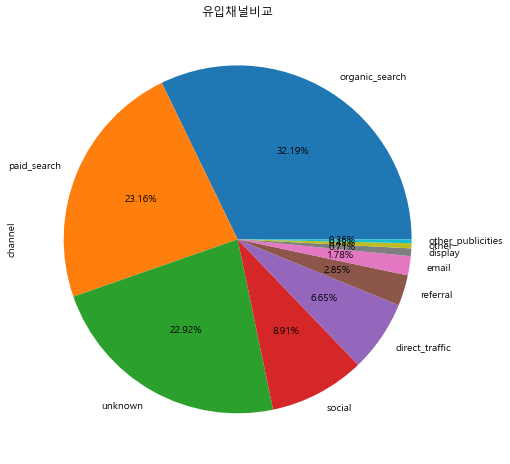

In [164]:
plt.figure (figsize = (12,8), facecolor = 'white')
df2['channel'].value_counts().plot.pie(autopct='%.2f%%')
plt.title('유입채널비교')
plt.show()

In [133]:
df2['lead_behaviour_profile'].value_counts()

cat            407
eagle          123
wolf            95
shark           24
cat, wolf        8
eagle, cat       3
eagle, wolf      3
shark, wolf      1
shark, cat       1
Name: lead_behaviour_profile, dtype: int64

In [134]:
df2['channel'].value_counts()

organic_search       271
paid_search          195
unknown              193
social                75
direct_traffic        56
referral              24
email                 15
display                6
other                  4
other_publicities      3
Name: channel, dtype: int64

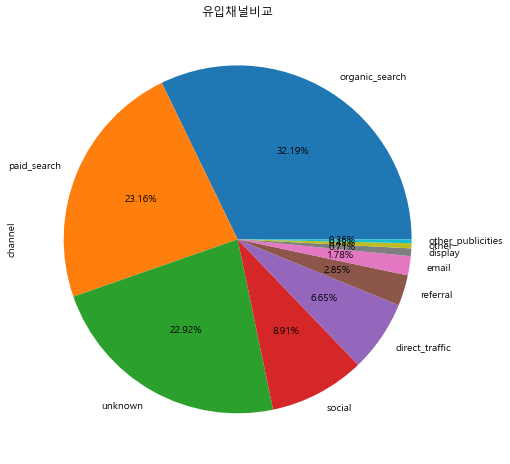

In [165]:
plt.figure (figsize = (12,8), facecolor = 'white')
df2['channel'].value_counts().plot.pie(autopct='%.2f%%')
plt.title('유입채널비교')
plt.show()

In [136]:
df2['isPaid'].value_counts()

non_paid    327
paid        322
unknown     193
Name: isPaid, dtype: int64

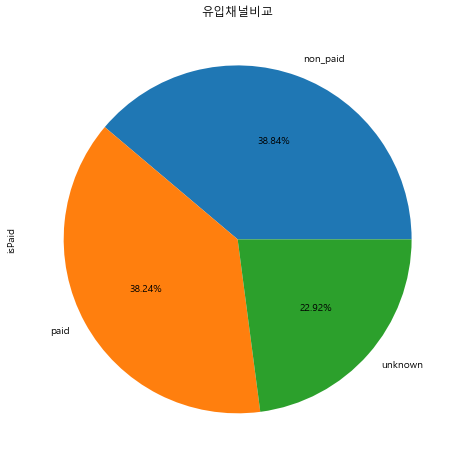

In [166]:
plt.figure (figsize = (12,8), facecolor = 'white')
df2['isPaid'].value_counts().plot.pie(autopct='%.2f%%')
plt.title('유입채널비교')
plt.show()

In [138]:
df2.head(2)

,seller_id,mql_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,landing_page_id,business_type,first_contact_date,landing_page_id,channel,isPaid
62,53be10ff134691e94a4089b41c75874f,33ce1e734d9d50629fa2c36769285d53,2b63542749aa9caf15f21816da1db341,d3d1e91a157ea7f90548eef82f1955e3,2018-09-11 13:14:37,construction_tools_house_garden,online_small,wolf,d41d8cd98f00b204e9800998ecf8427e,reseller,2017-07-11,d41d8cd98f00b204e9800998ecf8427e,unknown,unknown
91,160851d3ece7aa1a510f8d1a4bb8a8af,e2e57ded5b59a2058dd5855564c6b5ea,b90f87164b5f8c2cfa5c8572834dbe3f,4b339f9567d060bcea4f5136b9f5949e,2018-07-18 20:24:28,construction_tools_house_garden,industry,cat,b76ef37428e6799c421989521c0e5077,manufacturer,2017-07-14,b76ef37428e6799c421989521c0e5077,unknown,unknown
